# Using Datamine Studio With Python

## Introduction

The **Datamine Scripting** feature has been widely used in the mining industry for decades. Traditionally, it integrates Datamine Studio with JavaScript (JS) through **Microsoft’s Component Object Model (COM)**, a technology supported on Windows OS.

Since COM is compatible with multiple programming languages, **Datamine Scripting can also be used through Python integration**. This enables the use of Python’s powerful features, widely adopted in Data Science, such as:

- Plotting charts;
- Building complex data validation and analysis workflows;
- Embedding Machine Learning workflows.

If you are already familiar with Datamine Scripting via JS, this material will be very helpful. Throughout this notebook, we will explore **examples of Datamine Scripting functionalities using JS, each followed by a corresponding example in Python**.

## Requirements

In order to use **Datamine Scripting** with Python, you will need:

1. Datamine Studio (RM/OP/UG/Geo) with a valid license.

2. Install Python (I recommend installing via [Anaconda](https://www.anaconda.com/download)).

3. Install the following packages:

```cmd
pip install win32com
pip install pythoncom

```

The following libraries need to be installed to follow the examples, but are not required to connect with Datamine Studio.

```cmd
pip install pandas
pip install matplotlib
pip install seaborn

```

> **Note:** if you installed Python via Anaconda, all the dependencies are already installed in the `base` environment.

In [1]:
# Required Libraries
import pythoncom
import win32com.client as client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initializing Connection

Before anything else, you must open **Datamine Studio (RM/OP/UG/Geo)** in the project you will be working on (i.e. Active Project).  
Otherwise, the connection between **Python** and **Datamine Studio** will fail.

Next, we need to initialize **Datamine Scripting**. This is done by creating an **initialization function** (usually called `AutoConnect()`). 

Below, we will review how this function is built in **JS**, followed by its equivalent in **Python**.

> **Note:** The initialization function is the **main difference** between using Datamine Scripting in **JS** and **Python**.  
> The use of all other resources is almost identical, since both rely on the **Datamine Scripting Language**.


**JS**

```javascript
function AutoConnect() {
    oScript = new ActiveXObject("StudioCommon.ScriptHelper");
    oScript.initialize(window);
    oDmApp = oScript.getApplication();
}
```

**Python**

In [2]:
def auto_connect():
    try:
        pythoncom.CoInitialize()
        return client.Dispatch("Datamine.StudioRM.Application")
    except Exception as e:
        print("Failed to connect to Datamine StudioRM.")
        return None

In [3]:
# Initialize connection to Datamine StudioRM
odmapp = None

In [4]:
odmapp = auto_connect()

## Active Project Path

**JS**

```javascript
var projectPath = oDmApp.ActiveProject.Folder;
```

**Python**

In [5]:
project_path = odmapp.ActiveProject.Folder.replace("\\", "/")
print(f'Active Project Path: {project_path}')

Active Project Path: C:/Database/DM_Studio_Python_Integration_Examples


## Process Examples

### COPY

**JS**

```javascript
oDmApp.ParseCommand("copy &IN=" + inputFile + " &OUT=" + outputFile + " {ZONE=2}");

```

**Python**

In [6]:
input_file = "_vb_holes"
output_file = "_vb_holes_zone2"

odmapp.ParseCommand(f"copy &IN={input_file} &OUT={output_file} {{ZONE=2}}")

### MGSORT

**JS**

```javascript
oDmApp.ParseCommand("mgsort &IN=" + inputFile + " &OUT=" + outputFile + " *KEY1=BHID *KEY2=FROM @ORDER=1 @KEYSFRST=1 @ROWORDER=1 @KEYTOL=0.00001");

```

**Python**

In [7]:
input_file = "_vb_holes_zone2"
output_file = "_vb_holes_zone2_sorted"

odmapp.ParseCommand(f"mgsort &IN={input_file} &OUT={output_file} *KEY1=BHID *KEY2=FROM @ORDER=1 @KEYSFRST=1 @ROWORDER=1 @KEYTOL=0.00001")

### DMEDIT

**JS**

```javascript
    oDmApp.ParseCommand("dmedit &IN=" + inputFile + " @PRINT=0"+
        " 'c' 'LITH' 'LITHOLOGY' "+
        " 'c' 'AU' 'AU_PPM' "+
        " 'c' 'CU' 'CU_PCT' "+
        " '!' ");

```

**Python**

In [8]:
input_file = "_vb_holes_zone2_sorted"

odmapp.ParseCommand(f"dmedit &IN={input_file} @PRINT=0" +
        " 'c' 'LITH' 'LITHOLOGY' " +
        " 'c' 'AU' 'AU_PPM' " +
        " 'c' 'CU' 'CU_PCT' " +
        " '!' ")

### EXTRA

**JS**

```javascript
    oDmApp.ParseCommand("extra &IN=" + inputFile + " &OUT=" + outputFile + " @APPROX=0 @PRINT=0"+
        "'IF(ZONE == 0)'"+
            "'delete()'"+
        "'END'"+
        "'GO'");

```

**Python**

In [9]:
input_file = "_vb_modgrd"
output_file = "_vb_modgrd_nozone0"

odmapp.ParseCommand(f"extra &IN= {input_file} &OUT= {output_file} @APPROX=0 @PRINT=0"+
        "'IF(ZONE == 0)'"+
            "'delete()'"+
        "'END'"+
        "'GO'")

## Convert Datamine File to CSV

In order to convert a Datamine File to a CSV file, we could use `OUTPUT` native Datamine Studio process:

### OUTPUT

**JS**

```javascript
oDmApp.ParseCommand("output &IN=" + inputFile + " @CSV=1 @NODD=0 @DPLACE=-1 @IMPLICIT=1 '_vb_holes_.csv' ");

```

**Python**

In [10]:
input_file = "_vb_holes"

odmapp.ParseCommand(f"output &IN={input_file} @CSV=1 @NODD=0 @DPLACE=-1 @IMPLICIT=1 '_vb_holes_.csv' ")

### Pandas Example

Now we can use `pandas` to import the CSV file and preprocess and analyze the available data:

In [11]:
# Import CSV file
df = pd.read_csv(f"{project_path}/_vb_holes_.csv", na_values=['-'])

# Display first 5 rows
df.head()

,BHID,X,Y,Z,LENGTH,A0,B0,C0,FROM,TO,...,REFMETH,HOLETYPE,ENDDATE,LITH,NLITH,AU,CU,DENSITY,ZONE,RADIUS
0,VB2675,6085.681152,5144.979980,186.403793,3.000000,180.289993,49.950039,0,0.000000,3.000000,...,GPS,DD,11/11/98,Soil,0.0,NaN,NaN,NaN,NaN,1
1,VB2675,6085.676758,5144.175781,185.446899,0.500000,180.289993,49.950039,0,2.500000,3.000000,...,GPS,DD,11/11/98,Sandstone,1.0,NaN,NaN,NaN,NaN,1
2,VB2675,6085.331055,5075.604980,103.870598,212.636902,180.289993,49.950039,0,3.000000,215.636902,...,GPS,DD,11/11/98,Sandstone,1.0,NaN,NaN,NaN,NaN,1
3,VB2675,6084.823242,5006.608887,21.509710,2.250000,180.758408,50.404690,0,215.636902,217.886902,...,GPS,DD,11/11/98,Sandstone,1.0,NaN,NaN,2.62,NaN,1
4,VB2675,6084.805176,5005.254883,19.871401,2.000000,180.797104,50.477390,0,217.886902,219.886902,...,GPS,DD,11/11/98,Sandstone,1.0,NaN,NaN,2.65,NaN,1


In [12]:
# Select relevant columns and drop rows with missing values
target_cols = ['BHID', 'FROM', 'TO', 'LITH', 'AU', 'CU']
df_selected = df.dropna(axis=0, how='any', subset=target_cols)[target_cols]
df_selected.head()

,BHID,FROM,TO,LITH,AU,CU
12,VB2675,227.886902,229.886902,Siltstone,0.63,0.7
13,VB2675,229.886902,231.886902,Siltstone,0.56,0.6
14,VB2675,231.886902,233.886902,Siltstone,0.70,0.7
15,VB2675,233.886902,235.886902,Siltstone,0.42,0.5
16,VB2675,235.886902,237.886902,Siltstone,0.98,0.9


### Matplotlib Example

We can use `matplotlib` and `seaborn` to plot histograms:

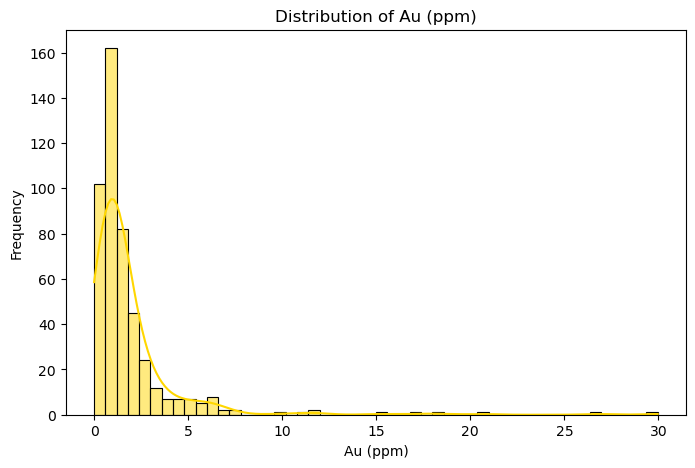

In [13]:
# Histogram of AU
plt.figure(figsize=(8, 5))

sns.histplot(df_selected['AU'], bins=50, kde=True, color='gold')
plt.title('Distribution of Au (ppm)')
plt.xlabel('Au (ppm)')
plt.ylabel('Frequency')
plt.show()

### Seaborn Example

We can use `seaborn` to plot boxplots:

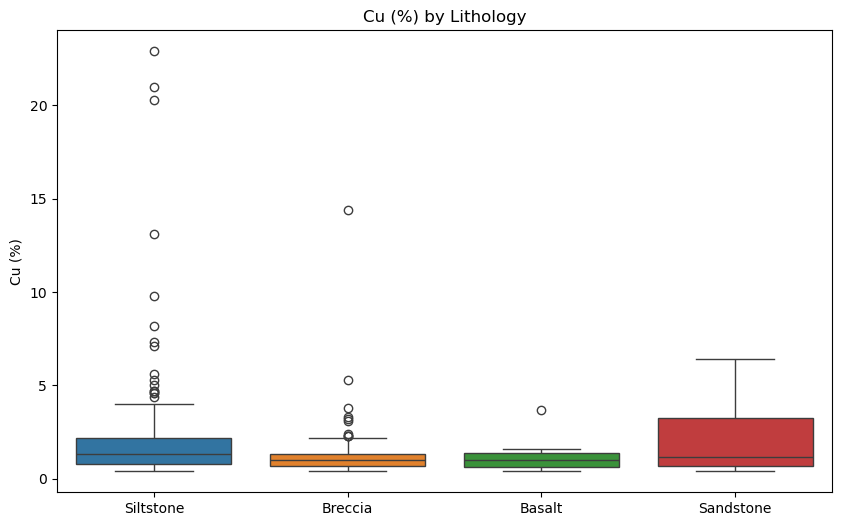

In [14]:
# Boxplots of CU grouped by LITH
plt.figure(figsize=(10, 6))
sns.boxplot(x='LITH', y='CU', data=df_selected, hue='LITH')
plt.title('Cu (%) by Lithology')
plt.xlabel('')
plt.ylabel('Cu (%)')
plt.show()

We can save/write the cleaned table to a CSV file in the active project path:

In [15]:
df_selected.to_csv(f"{project_path}/_vb_holes_cleaned.csv", index=False)
print(f"Preprocessed data saved to {project_path}/_vb_holes_cleaned.csv")

Preprocessed data saved to C:/Database/DM_Studio_Python_Integration_Examples/_vb_holes_cleaned.csv


## Convert CSV to Datamine File

In order to convert CSV file to Datamine File, we could use `INPFIL` native Datamine Studio process:

### INPFIL

**JS**

```javascript
oDmApp.parseCommand(f"inpfil &OUT=" + outputFile + " @PRINT=0" +
    " ''"+
    "'BHID' 'A' '16' 'Y' '-'"+
    "'FROM' 'N' 'Y' '-'"+
    "'TO' 'N' 'Y' '-'"+
    "'LITH' 'A' '16' 'Y' '-'"+
    "'AU' 'N' 'Y' '-'"+
    "'CU' 'N' 'Y' '-'"+
    " '!'"+
    " 'Y'"+
    "'_vb_holes_cleaned.csv'");

```

**Python**

In [16]:
output_file = "holes"

odmapp.parseCommand(f"inpfil &OUT={output_file} @PRINT=0" +
    " ''"+
    "'BHID' 'A' '16' 'Y' '-'"+
    "'FROM' 'N' 'Y' '-'"+
    "'TO' 'N' 'Y' '-'"+
    "'LITH' 'A' '16' 'Y' '-'"+
    "'AU' 'N' 'Y' '-'"+
    "'CU' 'N' 'Y' '-'"+
    " '!'"+
    " 'Y'"+
    "'_vb_holes_cleaned.csv'")

## Command Examples

### Opening Datamine File in 3D Window

We might need to open a Datamine File in 3D Window, so it can be treated as an Datamine Object.

**JS**

```javascript
objMin1St = oDmApp.ActiveProject.Data.LoadFromProject("_vb_min1st");

objMin2St = oDmApp.ActiveProject.Data.LoadFromProject("_vb_min2st");
```

**Python**

In [17]:
obj_min1st = odmapp.ActiveProject.Data.LoadFromProject("_vb_min1st")

In [19]:
obj_min2st = odmapp.ActiveProject.Data.LoadFromProject("_vb_min2st")

### Combine Objects

Now that we have two objects in the 3D Window, we could combine these objects into a single object.

**JS**

```javascript
objMin2St.Combine(objMin1St);
```

**Python**

In [20]:
obj_min2st.Combine(obj_min1st)

⚠️ **Note:** `Combine Objects` is an _inplace_ operation. Thus, it will overwrite the first object (i.e. `obj_min2st`).

### Saving Datamine Object

Since the new combined object is an Datamine Object, it is not saved in our machine yet. To save it, we could use the following:

**JS**

```javascript
objMin2St.SaveAsDatamineFile("_vb_min1st_min2st_combined", true, true, "");
```

**Python**

In [21]:
obj_min2st.SaveAsDatamineFile("_vb_min1st_min2st_combined", True, True, "")

⚠️ **Note:** In _JS_, boolean values are _lower case_ (i.e. `true`/`false`), while in _Python_ they are _capitalized_ (i.e. `True`/`False`).

## Building User Interface (UI)

Basically, we have two options to develop an UI for our Python code:

- **Executable Applications (Desktop)**
- **Web Applications**

### Executable Applications

**Main features:**

- Programs installed directly on the user’s computer;
- Run locally, usually as Windows (.exe), Linux (.bin/.run), or macOS (.app);
- Do not require an internet connection.

**Main Python Libraries:**

- [Tkinter](https://docs.python.org/3/library/tkinter.html): native Python library, ideal for simple interfaces;
- [PyQt5](https://doc.qt.io/archives/qtforpython-5/contents.html): external Python library, ideal for more complex and responsive interfaces.

⚠️ **Note:** You can also use the `PyQt6` library. It is the latest version of the `PyQt` project, but you will find more resources available online for the `PyQt5` library.

### Web Applications

**Main features:**

- Programs accessed through a browser (Chrome, Edge, etc.);
- Run on remote servers and deliver results to the client via HTTP/HTTPS;
- Usually depend on an internet connection.

**Main Python Libraries:**

- [Streamlit](https://streamlit.io/): external Python library, simple to use, dashboard-like application, ideal for (Geo)Data Scientists;
- [Flask](https://flask.palletsprojects.com/en/stable/): external Python library, great for small apps, requires great knowledge in web development.

⚠️ **Note:** Check out the [Composite Analyzer](https://github.com/fnaghetini/Composite-Analyzer) repository on GitHub, which demonstrates the integration between Studio and Python via a Streamlit Web App.

### Executable Apps vs. Web Apps

| Criterion             | Executable App                                  | Web App                                              |
|-----------------------|-------------------------------------------------|------------------------------------------------------|
| **Installation**      | Does not require installation                   | Requires installation of Python and its dependencies |
| **Resource Access**   | User simply run the app                         | User needs to run the app via Python Prompt          |
| **Deployment**        | Easy to deploy/compile using `PyInstaller`      | More difficult to deploy                             |
| **Interface**         | Old and less visually appealing widgets         | Modern and ready-to-use widgets                      |
| **Responsivity**      | More difficult to implement responsive features | Easy to implement responsive features                |


### Conclusion

In summary, to build more user-friendly applications, I would recommend **Executable Apps**, because:

1. Executable files (.exe) are more compatible with Windows features, which are required to integrate Studio with Python.

2. The simplest way to deploy a Streamlit web app is through Streamlit Cloud. However, this does not work because Streamlit Cloud is Linux-based, while Studio/Python integration requires Windows features (e.g., COM and ActiveX Objects). Although it is possible to deploy a Streamlit app to a Windows Cloud Server, this is not straightforward (you may have to use `Docker`).

3. Once the executable app is compiled, you only need to send the .exe file to the end user. Since all required components are already bundled, the user does not need to install Python or its dependencies.

4. I would recommend using the **PyQt5** library instead of **Tkinter**, as it is more modern and allows the creation of responsive and more visually appealing interface elements.